# Jupyter Notebook Purpose

- Once you have the finalized dataset please execute data exploration in preparation for Machine Learning
    - without Latitude and Longitude Information I am unable to link Kaggle data to TTC data
    - we may need to sacrifice that part of our work

## Group 2 Members

- 1. Melissa Hartwick - [Email](mailto:mhartwic@uwaterloo.ca)
- 2. McKinleigh Needham - [Email](mailto:mjneedha@uwaterloo.ca)
- 3. Daniel Adam Cebula  - [Email](mailto:dacebula@uwaterloo.ca)
- 4. Athithian Selvadurai - [Email](mailto:a6selvad@uwaterloo.ca)
- 5. Aravind Kakarala - [Email](mailto:akakaral@uwaterloo.ca)
- 6. Allan Sales - [Email](mailto:asales@uwaterloo.ca)

In [1]:
import pandas as pd
import numpy as np
import os
import requests  # simple HTTP library for Python
import io        # Tool for working with streams (Input/Ouput data)
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [2]:
# Get FilePaths
cwd = os.getcwd()

Final_Data_Directory = os.path.join(cwd, "FINAL_DATA")

Subway_Final_Data = os.path.join(Final_Data_Directory, "2014-2019-Subway_Weather_Data.csv")
Bus_Final_Data = os.path.join(Final_Data_Directory, "2014-2019-Bus_Weather_Data.csv")
Streetcar_Final_Data = os.path.join(Final_Data_Directory, "2014-2019-Streetcar_Weather_Data.csv")

In [3]:
# Load the Final Data into DataFrames
df_subway = pd.read_csv(Subway_Final_Data, parse_dates=["DateTime", "Date"])
df_bus = pd.read_csv(Bus_Final_Data, parse_dates=["DateTime", "Date"])
df_streetcar = pd.read_csv(Streetcar_Final_Data, parse_dates=["DateTime", "Date"])

In [4]:
df_subway.sample(5)

,DateTime,Date,BusinessQuarter,MonthName,WeekOfYear,DayName,HolidayName,Time,Station,LineBound,Code,CodeDescription,Temp (°C),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Min Delay,Min Gap
31227,2014-11-18 17:31:00,2014-11-18,4,November,47,Tuesday,Not A Holiday,17:31,UNION STATION,YU-NULL,MUO,Miscellaneous Other,-4.90,0.0,25.0,48.5,99.51,0,0
20583,2014-04-11 11:34:00,2014-04-11,2,April,15,Friday,Not A Holiday,11:34,EGLINTON STATION,YU-N,MUSC,Miscellaneous Speed Control,12.67,0.0,11.5,9.0,100.22,0,0
16271,2014-01-11 05:58:00,2014-01-11,1,January,2,Saturday,Not A Holiday,05:58,KIPLING STATION,BD-E,MUNOA,No Operator Immediately Available - Not E.S.A....,3.37,0.3,10.5,17.0,98.68,5,10
63821,2016-08-22 13:39:00,2016-08-22,3,August,34,Monday,Not A Holiday,13:39,ROYAL YORK STATION,BD-W,MUSC,Miscellaneous Speed Control,23.00,0.0,24.5,16.0,100.61,0,0
16903,2014-01-25 16:40:00,2014-01-25,1,January,4,Saturday,Not A Holiday,16:40,ST ANDREW STATION,YU-N,EUTRD,TR Cab Doors,-8.73,0.0,31.5,36.0,98.02,4,8


In [5]:
df_bus.sample(5)

,DateTime,Date,BusinessQuarter,MonthName,WeekOfYear,DayName,HolidayName,Time,Route,Location,Incident,Temp (°C),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Min Delay,Min Gap
30941,2014-04-18 21:05:00,2014-04-18,2,April,16,Friday,Good Friday,21:05:00,11,Davisville Station,Mechanical,6.50,0.0,30.5,19.0,101.09,10,20
452972,2019-12-27 18:00:00,2019-12-27,4,December,52,Friday,Additional Day,18:00:00,25,Don Mills and The Don Way,Diversion,4.37,0.0,28.0,18.0,100.67,42,53
108307,2015-02-26 08:25:00,2015-02-26,1,February,9,Thursday,Not A Holiday,08:25:00,196,Downsview Station,Mechanical,-14.77,0.0,2.0,15.0,100.58,2,4
426793,2019-07-05 16:23:00,2019-07-05,3,July,27,Friday,Not A Holiday,16:23:00,16,STC,Mechanical,28.57,0.0,16.0,17.5,100.01,11,22
348796,2018-05-29 18:18:00,2018-05-29,2,May,22,Tuesday,Not A Holiday,18:18:00,102,Sheppard on Markham,Mechanical,22.63,0.0,9.0,15.0,100.20,10,20


In [6]:
df_streetcar.sample(5)

,DateTime,Date,BusinessQuarter,MonthName,WeekOfYear,DayName,HolidayName,Time,Route,Location,Incident,Temp (°C),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Min Delay,Min Gap
5255,2014-07-05 16:40:00,2014-07-05,3,July,27,Saturday,Not A Holiday,16:40:00,511,Bathurst and Queen,Mechanical,23.80,0.00,23.5,18.5,100.49,4,8
58965,2018-06-20 17:08:00,2018-06-20,2,June,25,Wednesday,Not A Holiday,17:08:00,505,Broadview and Erindale,Mechanical,22.33,0.00,16.5,14.0,99.49,4,8
16724,2015-05-30 13:02:00,2015-05-30,2,May,22,Saturday,Not A Holiday,13:02:00,501,Connaught on Queen,Investigation,23.17,0.25,26.5,23.0,99.90,5,10
40299,2017-03-17 06:05:00,2017-03-17,1,March,11,Friday,Not A Holiday,06:05:00,501,Roncesvalles & Queen,Mechanical,-3.87,0.00,26.5,9.5,100.96,5,10
6872,2014-08-25 00:27:00,2014-08-25,3,August,35,Monday,Not A Holiday,00:27:00,501,Queen St. East and Alton Ave.,Mechanical,19.43,0.00,6.5,9.5,100.65,17,26


# Information about above dataframes

In [7]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121903 entries, 0 to 121902
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DateTime             121903 non-null  datetime64[ns]
 1   Date                 121903 non-null  datetime64[ns]
 2   BusinessQuarter      121903 non-null  int64         
 3   MonthName            121903 non-null  object        
 4   WeekOfYear           121903 non-null  int64         
 5   DayName              121903 non-null  object        
 6   HolidayName          121903 non-null  object        
 7   Time                 121903 non-null  object        
 8   Station              121903 non-null  object        
 9   LineBound            121903 non-null  object        
 10  Code                 121902 non-null  object        
 11  CodeDescription      119224 non-null  object        
 12  Temp (°C)            121899 non-null  float64       
 13  Precip. Amount

In [8]:
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453471 entries, 0 to 453470
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DateTime             453471 non-null  datetime64[ns]
 1   Date                 453471 non-null  datetime64[ns]
 2   BusinessQuarter      453471 non-null  int64         
 3   MonthName            453471 non-null  object        
 4   WeekOfYear           453471 non-null  int64         
 5   DayName              453471 non-null  object        
 6   HolidayName          453471 non-null  object        
 7   Time                 453471 non-null  object        
 8   Route                453471 non-null  int64         
 9   Location             452709 non-null  object        
 10  Incident             452543 non-null  object        
 11  Temp (°C)            453456 non-null  float64       
 12  Precip. Amount (mm)  453321 non-null  float64       
 13  Wind Dir (10s 

In [9]:
df_streetcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78392 entries, 0 to 78391
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DateTime             78392 non-null  datetime64[ns]
 1   Date                 78392 non-null  datetime64[ns]
 2   BusinessQuarter      78392 non-null  int64         
 3   MonthName            78392 non-null  object        
 4   WeekOfYear           78392 non-null  int64         
 5   DayName              78392 non-null  object        
 6   HolidayName          78392 non-null  object        
 7   Time                 78392 non-null  object        
 8   Route                78392 non-null  int64         
 9   Location             78146 non-null  object        
 10  Incident             78392 non-null  object        
 11  Temp (°C)            78386 non-null  float64       
 12  Precip. Amount (mm)  78374 non-null  float64       
 13  Wind Dir (10s deg)   78364 non-

# Example Histograms

In [10]:
# Min Max Scale Min Delay and Min Gap
df_subway["Min Delay MinMax"] = (df_subway["Min Delay"] - df_subway["Min Delay"].min()) / (df_subway["Min Delay"].max() - df_subway["Min Delay"].min())
df_bus["Min Delay MinMax"] = (df_bus["Min Delay"] - df_bus["Min Delay"].min()) / (df_bus["Min Delay"].max() - df_bus["Min Delay"].min())
df_streetcar["Min Delay MinMax"] = (df_streetcar["Min Delay"] - df_streetcar["Min Delay"].min()) / (df_streetcar["Min Delay"].max() - df_streetcar["Min Delay"].min())

df_subway["Min Gap MinMax"] = (df_subway["Min Gap"] - df_subway["Min Gap"].min()) / (df_subway["Min Gap"].max() - df_subway["Min Gap"].min())
df_bus["Min Gap MinMax"] = (df_bus["Min Gap"] - df_bus["Min Gap"].min()) / (df_bus["Min Gap"].max() - df_bus["Min Gap"].min())
df_streetcar["Min Gap MinMax"] = (df_streetcar["Min Gap"] - df_streetcar["Min Gap"].min()) / (df_streetcar["Min Gap"].max() - df_streetcar["Min Gap"].min())

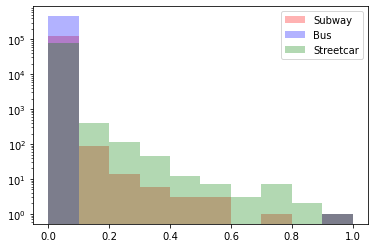

In [11]:
# Example Histograms
plt.hist(df_subway["Min Delay MinMax"], label="Subway", color="red", alpha=0.3)
plt.hist(df_bus["Min Delay MinMax"], label="Bus", color="blue", alpha=0.3)
plt.hist(df_streetcar["Min Delay MinMax"], label="Streetcar", color="green", alpha=0.3)
plt.yscale(value="log")
plt.legend();

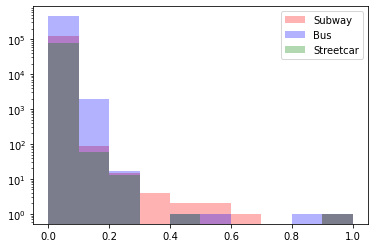

In [12]:
plt.hist(df_subway["Min Gap MinMax"], label="Subway", color="red", alpha=0.3)
plt.hist(df_bus["Min Gap MinMax"], label="Bus", color="blue", alpha=0.3)
plt.hist(df_streetcar["Min Gap MinMax"], label="Streetcar", color="green", alpha=0.3)
plt.yscale(value="log")
plt.legend();

# Example Time Series

- looks like the bus data "Min Delay" has an outlier we need to remove, "Min Gap" seems to be fine

In [13]:
# create dataframes for time series
df_subway_ts = df_subway.loc[:, ["DateTime", "Min Delay MinMax", "Min Gap MinMax"]]
df_bus_ts = df_bus.loc[:, ["DateTime", "Min Delay MinMax", "Min Gap MinMax"]]
df_streetcar_ts = df_streetcar.loc[:, ["DateTime", "Min Delay MinMax", "Min Gap MinMax"]]

# set index to be "DateTime"
df_subway_ts.index = df_subway_ts["DateTime"]
df_bus_ts.index = df_bus_ts["DateTime"]
df_streetcar_ts.index = df_streetcar_ts["DateTime"]

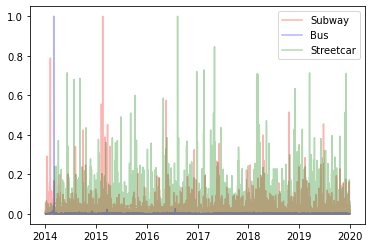

In [14]:
plt.plot(df_subway_ts["Min Delay MinMax"], label="Subway", color="red", alpha=0.3)
plt.plot(df_bus_ts["Min Delay MinMax"], label="Bus", color="blue", alpha=0.3)
plt.plot(df_streetcar_ts["Min Delay MinMax"], label="Streetcar", color="green", alpha=0.3)
plt.legend();

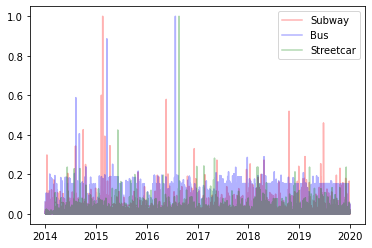

In [15]:
plt.plot(df_subway_ts["Min Gap MinMax"], label="Subway", color="red", alpha=0.3)
plt.plot(df_bus_ts["Min Gap MinMax"], label="Bus", color="blue", alpha=0.3)
plt.plot(df_streetcar_ts["Min Gap MinMax"], label="Streetcar", color="green", alpha=0.3)
plt.legend();

# Lets Combine the DataFrames together and Assign it as Bus, Subway or Streetcar

- will need to relabel and remove columns so the datasets can be matched

In [16]:
# Shared Columns
cols = [
    'DateTime', 'Date', 'BusinessQuarter', 'MonthName', 'WeekOfYear',
    'DayName', 'HolidayName', 'Time', 'Route', 'Location', 'Incident',
    'Temp (°C)', 'Precip. Amount (mm)', 'Wind Dir (10s deg)',
    'Wind Spd (km/h)', 'Stn Press (kPa)', 'Min Delay', 'Min Gap'
]

# rename the Subway Columns to match Bus and Streetcar and take a subset
df_subway = df_subway.loc[:, [
    'DateTime', 'Date', 'BusinessQuarter', 'MonthName', 'WeekOfYear',
    'DayName', 'HolidayName', 'Time', 'LineBound', 'Station', 'CodeDescription',
    'Temp (°C)', 'Precip. Amount (mm)', 'Wind Dir (10s deg)',
    'Wind Spd (km/h)', 'Stn Press (kPa)', 'Min Delay', 'Min Gap'
]].rename(columns={"LineBound": 'Route', 'Station':'Location', 'CodeDescription':'Incident'})

# take subset of columns for bus and streetcar
df_bus = df_bus.loc[:, cols]
df_streetcar = df_streetcar.loc[:, cols]

In [17]:
# Create a Column called Identity that establishes if data is from Subway, Bus or Streetcar
df_subway["Identity"] = "Subway"
df_bus["Identity"] = "Bus"
df_streetcar["Identity"] = "Streetcar"

# Move it to the front
cols = df_subway.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_subway = df_subway.loc[:,cols]

cols = df_bus.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_bus = df_bus.loc[:,cols]

cols = df_streetcar.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_streetcar = df_streetcar.loc[:,cols]

# Concatenate the Data Together and sort by DateTime
df_all = pd.concat([df_subway, df_bus, df_streetcar]).reset_index(drop=True)
df_all.sort_values(by=['DateTime', 'Identity'])

df_all.sample(20)

,Identity,DateTime,Date,BusinessQuarter,MonthName,WeekOfYear,DayName,HolidayName,Time,Route,Location,Incident,Temp (°C),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Min Delay,Min Gap
137544,Bus,2014-02-20 18:00:00,2014-02-20,1,February,8,Thursday,Not A Holiday,18:00:00,117,Steeles to Downsview,General Delay,0.57,1.9,7.5,25.5,99.86,20,30
93669,Subway,2018-05-22 16:13:00,2018-05-22,2,May,21,Tuesday,Not A Holiday,16:13,BD-NULL,BATHURST STATION,Injured Employee,15.50,0.0,4.5,7.0,99.83,0,0
446869,Bus,2018-01-31 17:27:00,2018-01-31,1,January,5,Wednesday,Not A Holiday,17:27:00,72,Pape Station,Utilized Off Route,0.90,0.0,20.5,26.0,99.02,15,30
215298,Bus,2014-12-27 17:39:00,2014-12-27,4,December,52,Saturday,Not A Holiday,17:39:00,42,Cummer at Bayview,Mechanical,8.70,0.0,23.0,29.0,99.80,12,24
213729,Bus,2014-12-17 15:00:00,2014-12-17,4,December,51,Wednesday,Not A Holiday,15:00:00,89,Entire route,General Delay,3.00,0.1,26.0,33.5,99.71,8,16
86533,Subway,2017-12-22 21:01:00,2017-12-22,4,December,51,Friday,Not A Holiday,21:01,BD-W,ST GEORGE BD STATION,Door Problems - Debris Related,-4.47,0.0,5.0,12.5,100.32,5,8
369305,Bus,2016-12-29 12:49:00,2016-12-29,4,December,52,Thursday,Additional Day,12:49:00,94,Brunswick ave and Harbord St,Investigation,2.27,0.0,25.0,25.5,98.47,13,26
620079,Streetcar,2017-07-14 05:20:00,2017-07-14,3,July,28,Friday,Not A Holiday,05:20:00,505,Dundas West station,Mechanical,17.90,0.0,8.0,13.0,99.98,8,0
237387,Bus,2015-04-01 16:06:00,2015-04-01,2,April,14,Wednesday,Not A Holiday,16:06:00,46,Kipling Stn,Utilized Off Route,5.57,0.0,10.5,11.5,100.65,9,18
238413,Bus,2015-04-07 17:40:00,2015-04-07,2,April,15,Tuesday,Not A Holiday,17:40:00,52,Lawrence Stn,Utilized Off Route,4.90,0.0,8.0,15.5,101.20,11,22


In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653766 entries, 0 to 653765
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Identity             653766 non-null  object        
 1   DateTime             653766 non-null  datetime64[ns]
 2   Date                 653766 non-null  datetime64[ns]
 3   BusinessQuarter      653766 non-null  int64         
 4   MonthName            653766 non-null  object        
 5   WeekOfYear           653766 non-null  int64         
 6   DayName              653766 non-null  object        
 7   HolidayName          653766 non-null  object        
 8   Time                 653766 non-null  object        
 9   Route                653766 non-null  object        
 10  Location             652758 non-null  object        
 11  Incident             650159 non-null  object        
 12  Temp (°C)            653741 non-null  float64       
 13  Precip. Amount

In [19]:
# lets save this dataframe just in case
df_all.to_csv(os.path.join(Final_Data_Directory, "2014-2019-TTC-Delay-Data.csv"), index=False)

# The data has the following problems that we can explore

- 1. Route, Location and Incident has too many categories
    - maybe we should translate it to something else?
    - Maybe take location and run it through Google API and get latitude / longitude?
- 2. Temp, Precip, Wind Dir, Wind Spd and Stn Press (kPa) have null values
    - maybe we should impute values based on the season / quarter? - included in dataset
    - maybe drop the records?
- 3. Bus / Streetcar and Subway Data has some outlier values identified above
    - maybe someone can examine it and make a determination as to what could be considered an outlier
- 4. I included a whole bunch of Date and DateTime attributes
    - I even included public holidays
- 5. We need to clean this up and feed it to our ML algorithms
    - this is the next step after we as a group make decisions

In [20]:
# Problem 1
df_all["Route"].unique()

array(['SRT-N', 'YU-N', 'BD-W', 'BD-E', 'SRT-S', 'YU-S', 'BD-NULL',
       'NULL-S', 'YU-NULL', 'SHP-E', 'SHP-W', 'SHP-NULL', 'SRT-B',
       'NULL-NULL', 'SRT-NULL', 'BD-S', 'YU-E', 'SRT-W', 'SRT-E',
       'NULL-W', '31 GREENWOOD-S', 'BD-B', 'YU-B', 'SHEPPARD-NULL',
       'YU/BD-NULL', 'NULL-E', 'YU-W', 'YU / BD-NULL', 'B/D-NULL',
       'B/D-E', 'YU/ BD-NULL', '16 MCCOWAN-NULL', 'NULL-N',
       'YONGE UNIVERSITY SERVI-NULL', 'YU & BD-NULL', 'RT-E', '999-NULL',
       'YUS-NULL', 'YU LINE-NULL', 'BD LINE-NULL', 'BD/YUS-NULL', 'SHP-S',
       'BLOOR DANFORTH-NULL', 'BD-N', '60-W', '9 BELLAMY-N',
       '45 KIPLING-NULL', '504-NULL', 'BD-Y', '95 YORK MILLS-NULL',
       '500-NULL', '104 FAYWOOD-NULL', '60 STEELES WEST-NULL',
       '25 DON MILLS-NULL', 'BD-R', '555-NULL', '36 FINCH WEST-NULL',
       '126 CHRISTIE-NULL', '37 ISLINGTON-NULL', '504 KING-NULL',
       '29 DUFFERIN-NULL', '116 MORNINGSIDE-NULL', 'BD/YU-NULL',
       'YU/BD-S', '73 ROYAL YORK-NULL', 'BLOOR DANFORTH LINE-N

In [21]:
len(df_all["Route"].unique()), len(df_all["Location"].unique()), len(df_all["Incident"].unique())

(559, 115566, 156)

In [22]:
# Problem 2 - problem appears to be less than ~0.5% in most cases
df_all.isnull().sum() / len(df_all) * 100

Identity               0.000000
DateTime               0.000000
Date                   0.000000
BusinessQuarter        0.000000
MonthName              0.000000
WeekOfYear             0.000000
DayName                0.000000
HolidayName            0.000000
Time                   0.000000
Route                  0.000000
Location               0.154184
Incident               0.551726
Temp (°C)              0.003824
Precip. Amount (mm)    0.030898
Wind Dir (10s deg)     0.032428
Wind Spd (km/h)        0.016367
Stn Press (kPa)        0.003824
Min Delay              0.000000
Min Gap                0.000000
dtype: float64

In [23]:
# Problem 3 - lets check out the statistics
# Look at that max for Min Delay 246245 minutes is 171 days
# no way we should include that in the data
df_all.describe()

,BusinessQuarter,WeekOfYear,Temp (°C),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),Min Delay,Min Gap
count,653766.000000,653766.000000,653741.000000,653564.000000,653554.000000,653659.000000,653741.000000,653766.000000,653766.000000
mean,2.482674,26.259431,9.106601,0.116592,20.241558,17.896218,100.162577,15.885523,23.274949
std,1.122752,15.113544,11.452730,0.763958,9.157157,9.221769,0.787161,310.703445,63.329204
min,1.000000,1.000000,-25.070000,0.000000,0.000000,0.000000,97.080000,-54.000000,-2.000000
25%,1.000000,13.000000,0.700000,0.000000,11.500000,11.000000,99.660000,4.000000,7.000000
50%,2.000000,26.000000,9.530000,0.000000,22.000000,16.500000,100.170000,8.000000,16.000000
75%,3.000000,39.000000,18.970000,0.000000,27.500000,23.000000,100.680000,14.000000,24.000000
max,4.000000,53.000000,34.630000,41.500000,36.000000,68.000000,102.890000,246245.000000,6528.000000
